In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing_cleaned.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# We see that we have an unwanted column "Unnamed" - DROP IT!
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


[Text(0, 0.5, 'OCEAN PROXIMITY')]

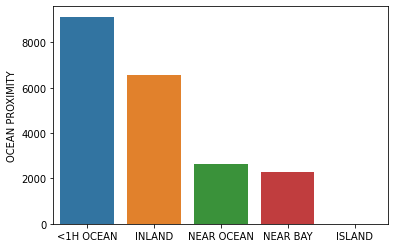

In [10]:
# classify houses according to the ocean proximity
sns.barplot(x=df['ocean_proximity'].value_counts().index, y=df['ocean_proximity'].value_counts()).set(ylabel=
'OCEAN PROXIMITY')

In [12]:
# We create a pivot table comparing the average house prices depending on ocean proximity
pd.pivot_table(df, index='ocean_proximity', values='median_house_value')

,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


#### The houses on an island seem to be the costliest! 
#### Houses near the bay and the ocean don't seem to have a huge difference but it makes sense that the houses near the bay are a bit more expensive.
#### 'NEAR OCEAN' is subjective. Technically, less than 1 hour ('<1H OCEAN') is also near ocean, and that could be the reason why there isn't much of a signifcant difference from the houses near ocean.
#### The houses inland are the cheapest. In fact, they are way cheaper, approximately $100,000 cheaper! This explains how location play a huge role when searching for houses!

In [13]:
# A pivot table to compare the population according to the distnce from the ocean
pd.pivot_table(df, index='ocean_proximity', values='population')

,population
ocean_proximity,
<1H OCEAN,1520.290499
INLAND,1391.046252
ISLAND,668.000000
NEAR BAY,1230.317467
NEAR OCEAN,1354.008653


In [15]:
# comparing house prices with age
pd.pivot_table(df, index='housing_median_age', values='median_house_value')

,median_house_value
housing_median_age,
1.0,144300.000000
2.0,224475.913793
3.0,235643.580645
4.0,229235.136126
5.0,208417.655738
6.0,203794.393750
7.0,193296.034286
8.0,194414.582524
9.0,186672.702439


[Text(0, 0.5, 'count'), Text(0.5, 0, 'Age')]

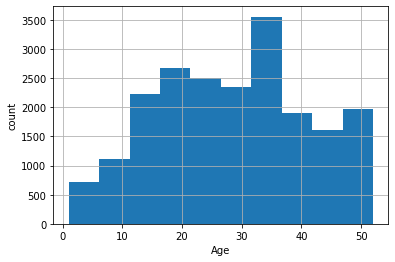

In [17]:
df.housing_median_age.hist().set(xlabel='Age', ylabel='count')

[Text(0.5, 0, 'Income (x $10,000)')]

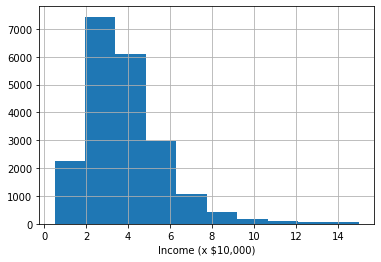

In [19]:
df.median_income.hist().set(xlabel='Income (x $10,000)')

In [21]:
# To make things easier let us plot a correlation between the variables
df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 
'median_house_value']].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


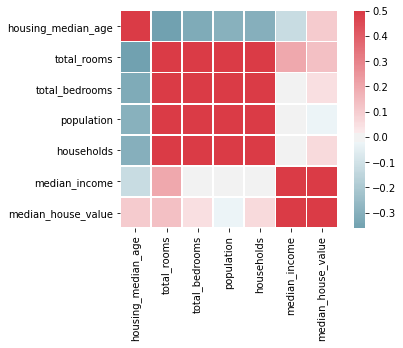

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 
'median_house_value']].corr(), vmax=.5, center=0, square=True, cmap=cmap, linewidth=0.5)

#### * It is intuitively obvious that there would be a very high positive correlation between total_rooms and total_bedrooms. 
#### * And since they both are correlated to each other, there would be a correlation between both of these with population and households. 
#### * Also there is a very positive correlation between median_income and median_house_value. 
#### * Interesting part is the negative correlation in total_rooms, total_bedrooms, population, households with housing_median_age, implying that older houses don't have enough rooms.

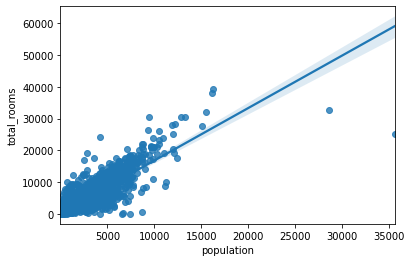

In [25]:
# let's plot these trends
sns.regplot(x='population', y='total_rooms', data=df)

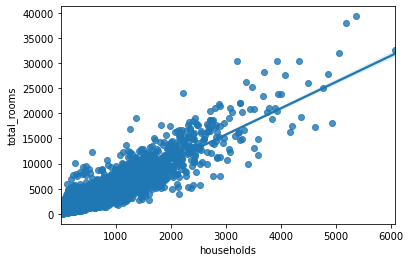

In [26]:
sns.regplot(x='households', y='total_rooms', data=df)

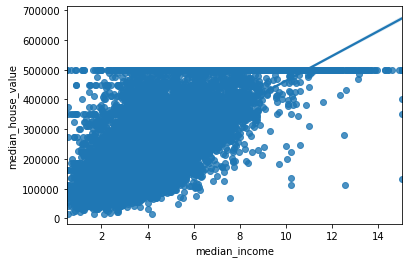

In [29]:
sns.regplot(x='median_income', y='median_house_value', data=df)

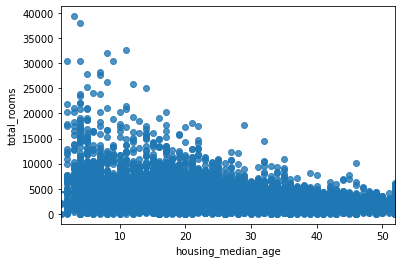

In [33]:
# This plot somewhat shows a decreasing trend as the house gets older
sns.regplot(x='housing_median_age', y='total_rooms', data=df)